<a href="https://colab.research.google.com/github/DarielAngel/ASP.NET/blob/main/Arbol_de_deciciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🌳 Arbol de decisión 🌲

In [39]:
import csv
import random

# Generar datos de ejemplo de pacientes
nombres = ["Juan", "María", "Pedro", "Ana", "Luis", "Laura", "Carlos", "Sofía", "Miguel", "Lucía"]
pacientes = []

for _ in range(1000):
    nombre = random.choice(nombres)
    edad = random.randint(30, 70)
    colesterol = random.randint(150, 300)
    problema_cardiaco = random.choice(["0", "1"])
    pacientes.append({"nombre": nombre, "edad": edad, "colesterol": colesterol, "problema_cardiaco": problema_cardiaco})

# Nombre del archivo CSV
archivo_csv = 'pacientes.csv'

# Crear y escribir en el archivo CSV
with open(archivo_csv, mode='w', newline='') as file:
    writer = csv.DictWriter(file, fieldnames=["nombre", "edad", "colesterol", "problema_cardiaco"])
    writer.writeheader()
    for paciente in pacientes:
        writer.writerow(paciente)

print(f"El archivo {archivo_csv} ha sido creado con éxito.")


El archivo pacientes.csv ha sido creado con éxito.


     nombre  edad  colesterol  problema_cardiaco
0      Luis    31         204                  1
1     Pedro    40         190                  1
2    Carlos    67         298                  1
3     María    32         186                  1
4      Juan    68         166                  0
..      ...   ...         ...                ...
995  Miguel    39         165                  0
996   Sofía    39         210                  1
997   Sofía    44         229                  1
998   Sofía    61         235                  0
999   Laura    68         221                  0

[1000 rows x 4 columns]


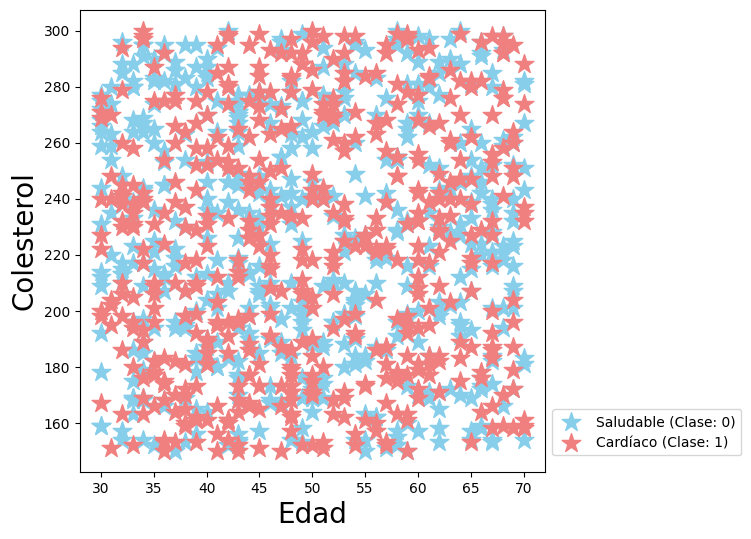

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

pacientes = pd.read_csv("pacientes.csv")

print(pacientes)

saludables = pacientes[pacientes["problema_cardiaco"]==0]
cardiacos = pacientes[pacientes["problema_cardiaco"]==1]

plt.figure(figsize=(6, 6))
plt.xlabel('Edad', fontsize = 20.0)
plt.ylabel('Colesterol', fontsize = 20)
plt.scatter(saludables["edad"], saludables["colesterol"],
            label="Saludable (Clase: 0)", marker="*", c="skyblue", s=200)
plt.scatter(cardiacos["edad"], cardiacos["colesterol"],
            label="Cardíaco (Clase: 1)", marker="*", c="lightcoral", s=200)
plt.legend(bbox_to_anchor=(1, 0.15))
plt.show()

# **Entropía:**
**Promedio de información almacenada en una variable aleatoria**

In [45]:
from scipy.stats import entropy
from math import log

print(entropy([1/2, 1/2], base=2))
print(entropy([6/10, 4/10], base=2))

edades = pd.Series([40, 30, 20, 50])
colesterol = pd.Series([100, 110, 100, 110])

print(edades.value_counts()/edades.size)
print(colesterol.value_counts()/colesterol.size)
print(entropy(edades.value_counts()/edades.size, base=2))
print(entropy(colesterol.value_counts()/colesterol.size, base=2))

1.0
0.9709505944546688
40    0.25
30    0.25
20    0.25
50    0.25
Name: count, dtype: float64
100    0.5
110    0.5
Name: count, dtype: float64
2.0
1.0


# **Datos de Entrenamiento y Prueba**

In [48]:
from sklearn.model_selection import train_test_split

datos_entrena, datos_prueba, clase_entrena, clase_prueba = train_test_split(
    pacientes[["edad", "colesterol"]],
    pacientes["problema_cardiaco"],
    test_size=0.30
)

# **Nueva Creación del Árbol de Decisión**

0.4866666666666667
|--- Colesterol <= 187.50
|   |--- Edad <= 34.50
|   |   |--- class: 0
|   |--- Edad >  34.50
|   |   |--- class: 1
|--- Colesterol >  187.50
|   |--- Colesterol <= 221.50
|   |   |--- class: 0
|   |--- Colesterol >  221.50
|   |   |--- class: 0



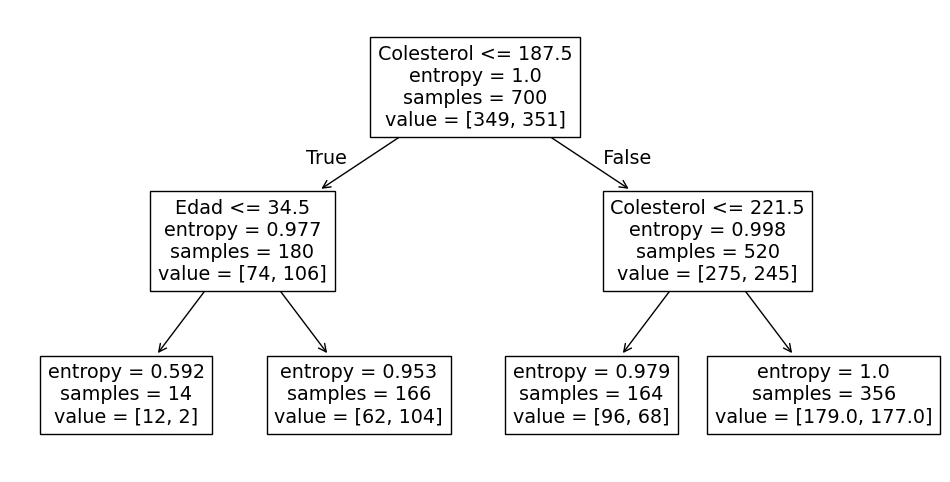

In [57]:
from sklearn import tree

arbol_decision = tree.DecisionTreeClassifier(criterion="entropy",
                                                      max_depth=2)

arbol = arbol_decision.fit(datos_entrena, clase_entrena)

accuracy = arbol_decision.score(datos_prueba, clase_prueba)

print(accuracy)

print(tree.export_text(arbol,
                       feature_names=["Edad", "Colesterol"]))

plt.figure(figsize=(12, 6))
tree.plot_tree(arbol, feature_names=["Edad", "Colesterol"])

plt.show()